In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers

In [79]:
class CNN_AE:
  def __init__(self, batch_shape, channels, rows, cols, latent_dim):
    self.encoder = None
    self.decoder = None
    self.autoencoder = None
    self.batch_shape  = batch_shape
    self.channels = channels
    self.rows = rows
    self.cols = cols
    self.latent_dim = latent_dim

  def build(self):
    input_shape = (self.rows, self.cols, self.channels)
    inputs = tf.keras.Input(input_shape)

    self.encoder = tf.keras.Sequential([
       layers.Conv2D(filters=128, kernel_size=(5, 5), input_shape=input_shape),
       layers.Conv2D(filters=64, kernel_size=(7, 7)),
       layers.Conv2D(filters=16, kernel_size=(9, 9)),
       layers.Conv2D(filters=4, kernel_size=(9, 9)),

       layers.Flatten(),
       layers.Dense(self.latent_dim, activation="relu"),
    ])

    self.decoder = tf.keras.Sequential([
        layers.Dense(rows * cols * channels, activation="sigmoid"),
        layers.Reshape(input_shape),


        layers.Conv2DTranspose(filters=4, kernel_size=(9, 9), padding='same'),
        layers.Conv2DTranspose(filters=16, kernel_size=(9, 9), padding='same'),
        layers.Conv2DTranspose(filters=64, kernel_size=(7, 7), padding='same'),
        layers.Conv2DTranspose(filters=128, kernel_size=(5, 5), padding='same'),

        layers.Conv2DTranspose(filters=self.channels, kernel_size=(5, 5), padding='same'),
    ])

    autoencoder_output = self.decoder(self.encoder(inputs))
    self.autoencoder = tf.keras.Model(inputs, autoencoder_output)
    return self.autoencoder

  def train(self, images_train, images_test, epochs=10):
    self.autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                             loss=tf.keras.losses.MeanSquaredError())
    self.autoencoder.fit(images_train, images_train, epochs=epochs, shuffle=True,
                         batch_size=self.batch_shape,
                         validation_data=(images_test, images_test))
    return self.autoencoder

  def test():
    return None

In [75]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [76]:
nb_images = x_train.shape[0]
rows = x_train.shape[1]
cols = x_train.shape[2]
channels = x_train.shape[3]
x_train.shape

(50000, 32, 32, 3)

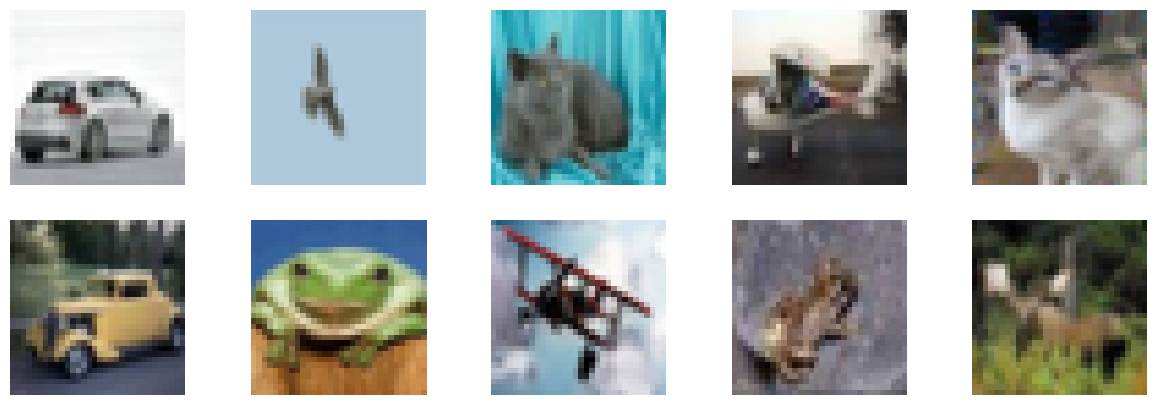

In [39]:
plt.figure(figsize=(15, 5))


for img, i in zip(tf.random.uniform((1, 10),
                  maxval=nb_images, dtype='int32',
                  seed=tf.random.set_seed(0))[0],
                  range(1, 11)):
  plt.subplot(2, 5, i)
  plt.imshow(x_train[img])
  plt.axis('off')

plt.subplots_adjust(wspace=0.2)


In [81]:
latent_dim = 32
cnn_ae_2 = CNN_AE(32, channels, rows, cols, latent_dim)

In [82]:
cnn_ae_2.build()
cnn_ae_2.train(x_train[:10000], x_test[:10000], 10)

Epoch 1/10
313/313 [==============================] - 15s 26ms/step - loss: 5138.6597 - val_loss: 4275.9951
Epoch 2/10
313/313 [==============================] - 7s 23ms/step - loss: 4189.2598 - val_loss: 4078.1284
Epoch 3/10
313/313 [==============================] - 7s 24ms/step - loss: 4197.0483 - val_loss: 4076.1931
Epoch 4/10
313/313 [==============================] - 7s 24ms/step - loss: 4179.5674 - val_loss: 4075.7244
Epoch 5/10
313/313 [==============================] - 7s 24ms/step - loss: 4140.7510 - val_loss: 4019.5112
Epoch 6/10
313/313 [==============================] - 7s 24ms/step - loss: 4153.5771 - val_loss: 4049.7473
Epoch 7/10
313/313 [==============================] - 8s 26ms/step - loss: 4109.3389 - val_loss: 4027.9956
Epoch 8/10
313/313 [==============================] - 7s 23ms/step - loss: 4188.2134 - val_loss: 4049.8027
Epoch 9/10
313/313 [==============================] - 7s 24ms/step - loss: 4142.3857 - val_loss: 4094.3611
Epoch 10/10
313/313 [===============

In [83]:
decoded_images = cnn_ae_2.autoencoder.predict(x_test)

313/313 [==============================] - 2s 5ms/step


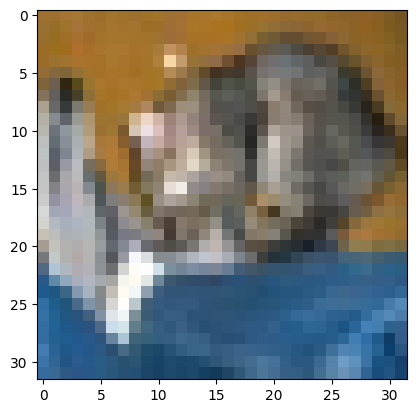

In [84]:
plt.imshow(x_test[0])

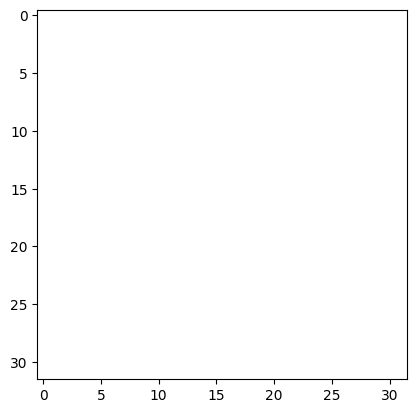

In [85]:
plt.imshow(decoded_images[0].reshape(rows, cols, channels))
